In [1]:
import requests
import json
import sys

import pandas as pd

sys.path.append("../src")

%load_ext autoreload
%autoreload 2

from mubi import metacritic, mubi


### TO DOs
- [x] dataclass and parsing function for mubi API output: extract film names, genres, country  
- [x] Mubi API calling class
- [x] Metacritic dataclass and parsing function for metacritic autosearch call
- [x] Metacritic Autosearch API calling class
- [ ] replace prints by a logger
- [ ] improve config management > set_path?


In [2]:
movie = metacritic.MetaCriticMovie.from_title("Mr. Bachmann and His Class")
print(movie)

In [45]:
collection_test = mubi.MubiCollection(name="Test Retest", id=490)
collection_test.movies = collection.movies[:3]
collection_test.save()

In [55]:
MUBI_FILM_GROUP_URL = "https://api.mubi.com/v3/film_groups?size=40&offset=0"

r = requests.get(MUBI_FILM_GROUP_URL, headers=mubi._HEADERS)

In [92]:
from pathlib import Path
import pandas as pd

path = Path("../data/20221030")

dfs = [pd.read_csv(file) for file in path.glob("*.csv")]
    
df = (pd.concat(dfs)
    .drop_duplicates(subset=["title", "year"])
    .sort_values("meta_score", ascending=False)
)

df.to_csv(path / "_mubi.csv")

In [93]:
app = mubi.MubiAllFilmGroups()

In [94]:
app.consolidate_all_films(Path("../data"))

## What is the correlation between metacritic score and mubi rating

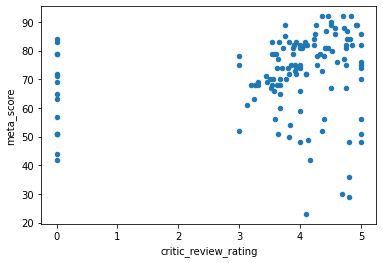

In [13]:
import pandas as pd

filepath = "../data/20221208_mubi.csv"

df = pd.read_csv(filepath)

fig = df.plot.scatter("critic_review_rating", "meta_score")